In [27]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
lemmatizer = WordNetLemmatizer()

In [3]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
king = wv['king']
king


array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [32]:
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/restau_review.csv')
reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [35]:
print(reviews.columns)


Index([' Review', 'Liked'], dtype='object')


In [16]:
reviews.isnull().sum()

,0
review,0
label,0


In [36]:
corpus = []
for i in range(0, len(reviews)):
  review = re.sub('[^a-z A-Z 0-9]', '', reviews[' Review'][i])
  review = review.lower()
  review = review.split()
  review = [lemmatizer.lemmatize(word) for word in review]
  review = ' '.join(review)
  corpus.append(review)


In [37]:
corpus

['wow loved this place',
 'crust is not good',
 'not tasty and the texture wa just nasty',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it',
 'the selection on the menu wa great and so were the price',
 'now i am getting angry and i want my damn pho',
 'honeslty it didnt taste that fresh',
 'the potato were like rubber and you could tell they had been made up ahead of time being kept under a warmer',
 'the fry were great too',
 'a great touch',
 'service wa very prompt',
 'would not go back',
 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced',
 'i tried the cape cod ravoli chicken with cranberrymmmm',
 'i wa disgusted because i wa pretty sure that wa human hair',
 'i wa shocked because no sign indicate cash only',
 'highly recommended',
 'waitress wa a little slow in service',
 'this place is not worth your time let alone vega',
 'did not like at all',
 'the burrittos blah',
 'the food amazing',

In [38]:
documents_in_words = []
for sentence in corpus:
  sentence_token = sent_tokenize(sentence)
  for words in sentence_token:
    documents_in_words.append(simple_preprocess(words))

In [39]:
documents_in_words

[['wow', 'loved', 'this', 'place'],
 ['crust', 'is', 'not', 'good'],
 ['not', 'tasty', 'and', 'the', 'texture', 'wa', 'just', 'nasty'],
 ['stopped',
  'by',
  'during',
  'the',
  'late',
  'may',
  'bank',
  'holiday',
  'off',
  'rick',
  'steve',
  'recommendation',
  'and',
  'loved',
  'it'],
 ['the',
  'selection',
  'on',
  'the',
  'menu',
  'wa',
  'great',
  'and',
  'so',
  'were',
  'the',
  'price'],
 ['now', 'am', 'getting', 'angry', 'and', 'want', 'my', 'damn', 'pho'],
 ['honeslty', 'it', 'didnt', 'taste', 'that', 'fresh'],
 ['the',
  'potato',
  'were',
  'like',
  'rubber',
  'and',
  'you',
  'could',
  'tell',
  'they',
  'had',
  'been',
  'made',
  'up',
  'ahead',
  'of',
  'time',
  'being',
  'kept',
  'under',
  'warmer'],
 ['the', 'fry', 'were', 'great', 'too'],
 ['great', 'touch'],
 ['service', 'wa', 'very', 'prompt'],
 ['would', 'not', 'go', 'back'],
 ['the',
  'cashier',
  'had',
  'no',
  'care',
  'what',
  'so',
  'ever',
  'on',
  'what',
  'had',
  'to

In [68]:
all_words = [word for sentence in documents_in_words for word in sentence]

unique_words = set(all_words)
len(unique_words)

1910

In [59]:
model = Word2Vec(documents_in_words, vector_size=100, min_count=1)
model.save('/content/drive/MyDrive/Colab Notebooks/word2vec.model')


In [60]:
# Displays the vocabulary and size
model.wv.index_to_key


['the',
 'and',
 'wa',
 'to',
 'is',
 'it',
 'this',
 'of',
 'food',
 'not',
 'place',
 'for',
 'in',
 'good',
 'service',
 'we',
 'very',
 'my',
 'with',
 'had',
 'great',
 'that',
 'be',
 'so',
 'were',
 'are',
 'have',
 'but',
 'back',
 'you',
 'here',
 'they',
 'on',
 'time',
 'at',
 'like',
 'go',
 'all',
 'our',
 'will',
 'really',
 'just',
 'there',
 'an',
 'their',
 'if',
 'best',
 'would',
 'restaurant',
 'dont',
 'ever',
 'also',
 'one',
 'only',
 'never',
 'friendly',
 'nice',
 'no',
 'out',
 'your',
 'up',
 'again',
 'from',
 'amazing',
 'what',
 'delicious',
 'been',
 'did',
 'by',
 'im',
 'which',
 'vega',
 'get',
 'when',
 'some',
 'experience',
 'came',
 'love',
 'ive',
 'pretty',
 'or',
 'wont',
 'he',
 'eat',
 'minute',
 'even',
 'disappointed',
 'staff',
 'server',
 'star',
 'definitely',
 'much',
 'steak',
 'going',
 'me',
 'got',
 'chicken',
 'pizza',
 'bad',
 'well',
 'price',
 'dish',
 'first',
 'salad',
 'made',
 'about',
 'say',
 'more',
 'burger',
 'menu',
 't

In [61]:
len(model.wv.index_to_key)

1910

In [62]:
model.corpus_count

1000

In [63]:
model.corpus_total_words

10173

In [64]:
model.epochs

5

In [65]:
model.wv.similar_by_word('tasteless')

[('first', 0.8997063636779785),
 ('when', 0.8983646631240845),
 ('he', 0.8956828117370605),
 ('be', 0.8954287171363831),
 ('good', 0.894790768623352),
 ('you', 0.8946305513381958),
 ('we', 0.8945444822311401),
 ('by', 0.8942703604698181),
 ('it', 0.8941697478294373),
 ('which', 0.8940070271492004)]

In [66]:
model.wv['tasteless'].shape

(100,)

In [94]:
def avg_wvec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis=0)


In [95]:
from tqdm import tqdm

In [96]:
X=[]
for i in tqdm(range(len(documents_in_words))):
  X.append(avg_wvec(documents_in_words[i]))

100%|██████████| 1000/1000 [00:00<00:00, 10276.50it/s]


In [97]:
X

[array([-0.03837948,  0.04091295,  0.01915599,  0.01036213,  0.00848126,
        -0.09641193,  0.03063249,  0.14225708, -0.048195  , -0.07633397,
         0.00361859, -0.08046391,  0.00055142,  0.0498715 ,  0.00684979,
        -0.03922352,  0.04422966, -0.05207209, -0.03090417, -0.13468178,
         0.03818724,  0.00280317,  0.07277398, -0.05261559, -0.01050304,
        -0.0130574 , -0.0455855 , -0.02356734, -0.04725521,  0.02591326,
         0.09215713,  0.01111638,  0.04448711, -0.06576207, -0.01821186,
         0.07702363,  0.01584793, -0.06152268, -0.04818854, -0.10401279,
         0.00758062, -0.06281655, -0.03830411, -0.01100858,  0.06257193,
        -0.03353844, -0.04097948, -0.02003532,  0.04341828,  0.03620344,
         0.03982969, -0.04497662, -0.02808765, -0.00628826, -0.0368604 ,
         0.01989387,  0.02522727,  0.00464805, -0.06405573,  0.04072054,
        -0.00762464,  0.02402051,  0.00392478, -0.01809572, -0.06740714,
         0.08195455,  0.02647117,  0.06272142, -0.0

In [101]:
X = np.array(X)

In [102]:
X.shape

(1000, 100)

In [103]:
X[0]

array([-0.03837948,  0.04091295,  0.01915599,  0.01036213,  0.00848126,
       -0.09641193,  0.03063249,  0.14225708, -0.048195  , -0.07633397,
        0.00361859, -0.08046391,  0.00055142,  0.0498715 ,  0.00684979,
       -0.03922352,  0.04422966, -0.05207209, -0.03090417, -0.13468178,
        0.03818724,  0.00280317,  0.07277398, -0.05261559, -0.01050304,
       -0.0130574 , -0.0455855 , -0.02356734, -0.04725521,  0.02591326,
        0.09215713,  0.01111638,  0.04448711, -0.06576207, -0.01821186,
        0.07702363,  0.01584793, -0.06152268, -0.04818854, -0.10401279,
        0.00758062, -0.06281655, -0.03830411, -0.01100858,  0.06257193,
       -0.03353844, -0.04097948, -0.02003532,  0.04341828,  0.03620344,
        0.03982969, -0.04497662, -0.02808765, -0.00628826, -0.0368604 ,
        0.01989387,  0.02522727,  0.00464805, -0.06405573,  0.04072054,
       -0.00762464,  0.02402051,  0.00392478, -0.01809572, -0.06740714,
        0.08195455,  0.02647117,  0.06272142, -0.08466129,  0.07

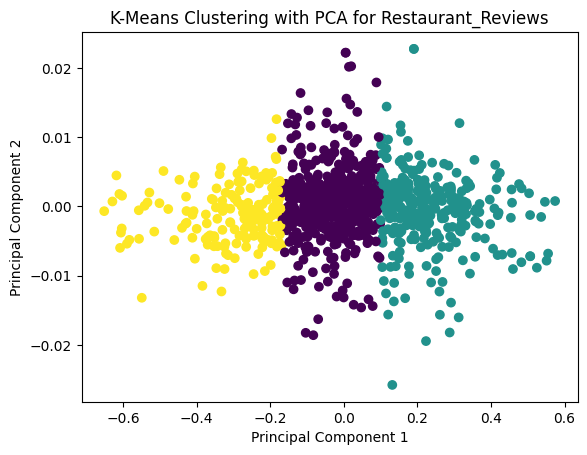

In [143]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
labels = kmeans.labels_

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_pca)

plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA for Restaurant_Reviews')
plt.show()

In [144]:
labels

array([2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2,
       0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1,
       1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0,

In [145]:
len(labels)

1000

In [146]:
reviews_Kmeans = reviews.copy()
reviews_Kmeans = reviews_Kmeans.drop(['Liked'], axis=1)
reviews_Kmeans['Cluster'] = labels
reviews_Kmeans.head(10)

,Review,Cluster
0,Wow... Loved this place.,2
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,1
3,Stopped by during the late May bank holiday of...,2
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,2
6,Honeslty it didn't taste THAT fresh.),2
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,2


In [111]:
from scipy.spatial.distance import cdist


def update_noise_eta(u, d, m):

    u = u ** m
    d_2 = d**2
    n = np.sum(u * d_2, axis=1) / np.sum(u, axis=1)
    return n


def update_cluster_centers(x, u, m):
    um = u ** m
    v = um.dot(x.T) / np.atleast_2d(um.sum(axis=1)).T
    return v


def fcm_criterion(x, v, n, m, metric):

    d = cdist(x.T, v, metric=metric).T

    # Sanitize Distances (Avoid Zeroes)
    d = np.fmax(d, np.finfo(x.dtype).eps)

    exp = -2. / (m - 1)
    d2 = d ** exp

    u = d2 / np.sum(d2, axis=0, keepdims=1)
    return u, d


def pcm_criterion(x, v, n, m, metric):

    d = cdist(x.T, v, metric=metric)
    d = np.fmax(d, np.finfo(x.dtype).eps)

    d2 = (d ** 2) / n
    exp = 1. / (m - 1)
    d2 = d2.T ** exp
    u = 1. / (1. + d2)

    return u, d


In [112]:
def cmeans(x, c, m, e, max_iterations, criterion_function, metric="euclidean", v0=None, n=None):

    if not x.any() or len(x) < 1 or len(x[0]) < 1:
        print("Error: Data is in incorrect format")
        return

    # Num Features, Datapoints
    S, N = x.shape

    if not c or c <= 0:
        print("Error: Number of clusters must be at least 1")

    if not m or m <= 1:
        print("Error: Fuzzifier must be greater than 1")
        return

    # Initialize the cluster centers
    # If the user doesn't provide their own starting points,
    if v0 is None:
        # Pick random values from dataset
        xt = x.T
        v0 = xt[np.random.choice(xt.shape[0], c, replace=False), :]

    # List of all cluster centers (Bookkeeping)
    v = np.empty((max_iterations, c, S))
    v[0] = np.array(v0)

    # Membership Matrix Each Data Point in eah cluster
    u = np.zeros((max_iterations, c, N))

    # Number of Iterations
    t = 0

    while t < max_iterations - 1:

        u[t], d = criterion_function(x, v[t], n, m, metric)
        v[t + 1] = update_cluster_centers(x, u[t], m)

        # Stopping Criteria
        if np.linalg.norm(v[t + 1] - v[t]) < e:
            break

        t += 1

    return v[t], v[0], u[t - 1], u[0], d, t



In [113]:
def fcm(x, c, m, e, max_iterations, metric="euclidean", v0=None):

    return cmeans(x, c, m, e, max_iterations, fcm_criterion, metric, v0=v0)


def pcm(x, c, m, e, max_iterations, metric="euclidean", v0=None):
    v, v0, u, u0, d, t = fcm(x, c, m, e, max_iterations, metric=metric, v0=v0)
    n = update_noise_eta(u, d, m)
    return cmeans(x, c, m, e, t, pcm_criterion, metric, v0=v, n=n)

In [129]:
def plot_clusters(x, u, v, threshold=0.3):
    """
    Parameters:
    `x`: Dataset, size (S, N)
        Data to be clustered. N is the number of data sets; S is the number of features.

    `u`: Final Membership Matrix, size (C, N)
        Final partitioned matrix from PCM, where each value u[i,j] is the membership of data point j to cluster i.

    `v`: cluster centers, size (C, S)
        Final cluster centers from PCM.

    `threshold`: float
        Threshold for determining outliers based on membership values.
    """

    # Number of clusters and data points
    num_clusters, num_points = u.shape

    # Find the cluster with the highest membership for each point
    max_membership = np.max(u, axis=0)
    assigned_clusters = np.argmax(u, axis=0)

    cluster_labels = [-1]*num_points

    # Assign points to clusters or mark as outliers
    for i in range(num_points):
        if max_membership[i] >= threshold:
            cluster_labels[i] = assigned_clusters[i]


    # Debugging: print how many points are classified in each cluster and how many are outliers
    for i in range(num_clusters):
        print(f"Number of points in Cluster {i}: {cluster_labels.count(i)}")
    print(f"Number of outliers: {cluster_labels.count(-1)}")

    # Plot clusters
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    plt.figure(figsize=(10, 10))
    for i in range(num_clusters):
        cluster_indices = [idx for idx, label in enumerate(cluster_labels) if label == i]
        if cluster_indices:
            cluster_data = x[:, cluster_indices]  # Retrieve data points using indices
            plt.scatter(cluster_data[0, :], cluster_data[1, :], c=colors[i % len(colors)], marker='*', label=f'Cluster {i}')

    # Plot outliers in black
    outlier_indices = [idx for idx, label in enumerate(cluster_labels) if label == -1]
    if outlier_indices:
        outlier_data = x[:, outlier_indices]  # Retrieve outlier points using indices
        plt.scatter(outlier_data[0, :], outlier_data[1, :], c='k', marker='x', label='Outliers')

    # Plot cluster centers
    plt.scatter(v[:, 0], v[:, 1], c='black', marker='o', s=100, label='Centroids')

    plt.title("PCM Clustering with Outliers")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

    return cluster_labels


In [148]:
X_pca_2d = X_pca_2d.T

Number of points in Cluster 0: 112
Number of points in Cluster 1: 413
Number of points in Cluster 2: 410
Number of outliers: 65


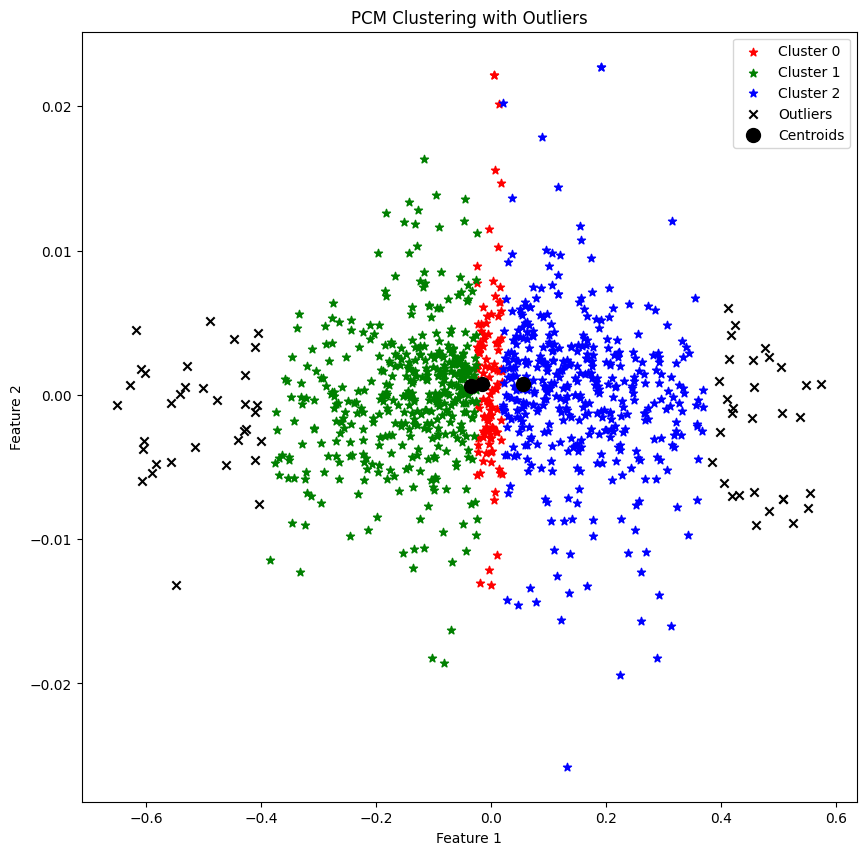

In [150]:

# Set the parameters for PCM
c = 3
m = 2.0
e = 0.01
max_iterations = 200

v, v0, u, u0, d, t = pcm(X_pca_2d, c, m, e, max_iterations)

# Plot the results
cluster_labels=plot_clusters(X_pca_2d, u, v, threshold=0.091)

In [151]:
reviews_PCM = reviews.copy()
reviews_PCM = reviews_PCM.drop(['Liked'], axis=1)
reviews_PCM['Cluster'] = cluster_labels
reviews_PCM.head(10)

,Review,Cluster
0,Wow... Loved this place.,1
1,Crust is not good.,2
2,Not tasty and the texture was just nasty.,2
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,-1
5,Now I am getting angry and I want my damn pho.,1
6,Honeslty it didn't taste THAT fresh.),1
7,The potatoes were like rubber and you could te...,2
8,The fries were great too.,2
9,A great touch.,1


In [152]:
reviews_PCM.to_csv('/content/drive/MyDrive/Colab Notebooks/reviews_PCM.csv')

In [153]:
reviews_Kmeans.to_csv('/content/drive/MyDrive/Colab Notebooks/reviews_Kmeans.csv')